In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import config;
from config import db_pw;
import psycopg2;

In [4]:
#establishing the connection
conn = psycopg2.connect(
   database="Senescence_DB", user='postgres', password= db_pw, host='127.0.0.1', port= '5432'
)

#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''SELECT * from birds_data_raw''')

#Fetching 1st row from the table
result_df = pd.DataFrame(cursor.fetchall(), columns=["Collection_Num", "Bird_ID", "Sex", "Agey", "AgeClass", "BirthFPID", "U_PlateID", "RTL", "Technician", "Terr", "FPID", "Mum", "Dad", "Mac", "Pac", "BRF", "BRM"]);
print(result_df)

#Commit your changes in the database
conn.commit()

#Closing the connection
conn.close()

      Collection_Num  Bird_ID  Sex       Agey AgeClass  BirthFPID U_PlateID  \
0                  1     5511    0   0.246575        J        103       9_3   
1                  2     5559    1   3.597260        A        103       9_1   
2                  3     5559    1   4.715068        A        103      9_28   
3                  4     5559    1   0.657534       SA        103       9_2   
4                  5     5527    1   0.328767      OFL        103       9_3   
...              ...      ...  ...        ...      ...        ...       ...   
2657            2658      221    1   6.958904        A          8       2_1   
2658            2659      216    1   8.947945        A          8       8_8   
2659            2660      176    1   6.772603        A          8      7_32   
2660            2661      221    1   9.090411        A          8      1_12   
2661            2662      176    1  13.873973        A          8       4_3   

       RTL  Technician   Terr  FPID   Mum   Dad    

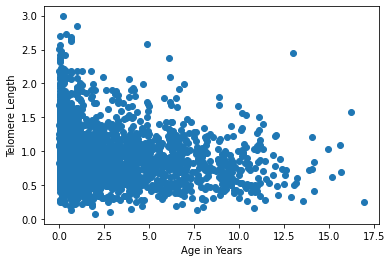

In [3]:
plt.scatter(df.AgeY, df.RTL)
plt.xlabel('Age in Years')
plt.ylabel('Telomere Length')
plt.show()

In [4]:
X= df.RTL.values.reshape(-1, 1)
y= df.AgeY

In [5]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(2664,)


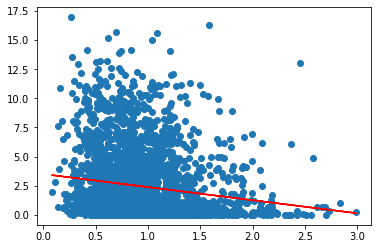

In [6]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [7]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[-1.11956704]
3.5013089397435526


In [8]:
rtl= df.drop(["AgeClass"], axis=1)
rtl.head()

,BirdID,Sex,AgeY,BirthFPID,U_PlateID,RTL,Technician,Terr,FPID,mum,dad,MAC,PAC,BrF,BrM
0,5511,0,0.246575,103,9_3,1.06,1,10.0,104,4863.0,1762.0,3.920548,7.443836,4863.0,1762.0
1,5559,1,3.597260,103,9_1,0.52,1,77.1,122,1716.0,1877.0,7.416438,6.235616,1716.0,4892.0
2,5559,1,4.715068,103,9_28,1.07,1,77.1,125,1716.0,1877.0,7.416438,6.235616,1716.0,4892.0
3,5559,1,0.657534,103,9_2,0.99,1,111.0,104,1716.0,1877.0,7.416438,6.235616,1716.0,4892.0
4,5527,1,0.328767,103,9_3,1.02,1,131.0,104,4936.0,1710.0,3.452055,7.778082,1707.0,1710.0


In [9]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler().fit_transform(rtl)
print(scaled[0:5])

[[ 1.01863542 -1.03437424 -0.75739765  1.23592637 -1.59844894  0.34875305
  -0.60221246 -1.20254183  0.76968047  1.61812532 -0.16486916 -0.30917945
   0.71878509  1.75816476 -0.22282191]
 [ 1.04439841  0.96676808  0.38530605  1.23592637 -1.60499946 -1.0303832
  -0.60221246  0.65967054  1.2849283  -0.36516798 -0.08676513  0.98792809
   0.30907738 -0.28013163  1.78541926]
 [ 1.04439841  0.96676808  0.76651873  1.23592637  1.13639165  0.37429261
  -0.60221246  0.65967054  1.37080294 -0.36516798 -0.08676513  0.98792809
   0.30907738 -0.28013163  1.78541926]
 [ 1.04439841  0.96676808 -0.61724593  1.23592637 -1.6017242   0.16997613
  -0.60221246  1.60049021  0.76968047 -0.36516798 -0.08676513  0.98792809
   0.30907738 -0.28013163  1.78541926]
 [ 1.02722308  0.96676808 -0.7293673   1.23592637 -1.59844894  0.24659481
  -0.60221246  2.15554605  0.76968047  1.66413117 -0.20018577 -0.48300812
   0.83212827 -0.28596089 -0.25618566]]


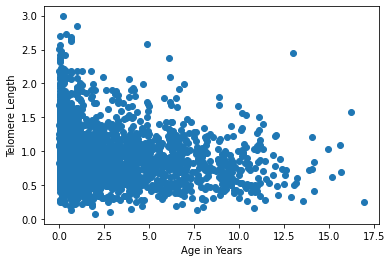

In [10]:
plt.scatter(rtl.AgeY, rtl.RTL)
plt.xlabel('Age in Years')
plt.ylabel('Telomere Length')
plt.show()

In [11]:
df.corr()

,BirdID,Sex,AgeY,BirthFPID,RTL,Technician,Terr,FPID,mum,dad,MAC,PAC,BrF,BrM
BirdID,1.000000,-0.032799,-0.402702,0.935203,-0.097953,-0.441350,0.120456,0.792171,0.744366,0.672069,0.085183,0.219299,0.694089,0.668582
Sex,-0.032799,1.000000,0.004021,0.001351,0.009161,0.043383,0.009378,-0.011644,-0.022519,-0.005792,0.036246,-0.011910,-0.039599,0.011216
AgeY,-0.402702,0.004021,1.000000,-0.377011,-0.149498,0.180967,-0.019267,0.133214,-0.285615,-0.269111,-0.040462,-0.063630,-0.270187,-0.265576
BirthFPID,0.935203,0.001351,-0.377011,1.000000,-0.108164,-0.414599,0.105466,0.793846,0.782615,0.731796,0.103404,0.196595,0.738257,0.725901
RTL,-0.097953,0.009161,-0.149498,-0.108164,1.000000,0.130194,0.021244,-0.215176,-0.118299,-0.085304,0.037898,-0.070001,-0.102571,-0.091120
Technician,-0.441350,0.043383,0.180967,-0.414599,0.130194,1.000000,-0.041785,-0.377784,-0.349441,-0.318137,-0.038862,-0.109944,-0.332168,-0.328636
Terr,0.120456,0.009378,-0.019267,0.105466,0.021244,-0.041785,1.000000,0.108167,0.113622,0.092245,-0.018267,-0.023559,0.105006,0.089682
FPID,0.792171,-0.011644,0.133214,0.793846,-0.215176,-0.377784,0.108167,1.000000,0.643086,0.593194,0.072607,0.173054,0.603421,0.588899
mum,0.744366,-0.022519,-0.285615,0.782615,-0.118299,-0.349441,0.113622,0.643086,1.000000,0.689732,-0.382364,0.068453,0.930313,0.678544
dad,0.672069,-0.005792,-0.269111,0.731796,-0.085304,-0.318137,0.092245,0.593194,0.689732,1.000000,0.013107,-0.348216,0.659046,0.809219
